In [182]:
import pandas as pd

# 파일 경로 설정
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"

# CSV 파일 로드
df = pd.read_csv(train_path)

# 컬럼별 결측치 개수 및 비율 확인
missing_values = df.isnull().sum()  # 결측치 개수
missing_ratio = (missing_values / len(df)) * 100  # 결측치 비율 (%)

# 결측치가 있는 컬럼만 출력
missing_df = pd.DataFrame({
    "컬럼명": df.columns,
    "결측치 개수": missing_values.values,
    "결측치 비율(%)": missing_ratio.values
})

missing_df = missing_df[missing_df["결측치 개수"] > 0].reset_index(drop=True)

# 결과 출력
if missing_df.empty:
    print("✅ 데이터에 결측치가 없습니다!")
else:
    print("\n📌 컬럼별 결측치 현황")
    print(missing_df.to_string(index=False))


📌 컬럼별 결측치 현황
                  컬럼명  결측치 개수  결측치 비율(%)
임신 시도 또는 마지막 임신 경과 연수  246979  96.344827
          단일 배아 이식 여부    6291   2.454076
     착상 전 유전 검사 사용 여부  253631  98.939727
     착상 전 유전 진단 사용 여부    6291   2.454076
          배아 생성 주요 이유    6291   2.454076
            총 생성 배아 수    6291   2.454076
           미세주입된 난자 수    6291   2.454076
      미세주입에서 생성된 배아 수    6291   2.454076
             이식된 배아 수    6291   2.454076
         미세주입 배아 이식 수    6291   2.454076
             저장된 배아 수    6291   2.454076
      미세주입 후 저장된 배아 수    6291   2.454076
             해동된 배아 수    6291   2.454076
              해동 난자 수    6291   2.454076
          수집된 신선 난자 수    6291   2.454076
          저장된 신선 난자 수    6291   2.454076
             혼합된 난자 수    6291   2.454076
     파트너 정자와 혼합된 난자 수    6291   2.454076
     기증자 정자와 혼합된 난자 수    6291   2.454076
          동결 배아 사용 여부    6291   2.454076
          신선 배아 사용 여부    6291   2.454076
          기증 배아 사용 여부    6291   2.454076
               대리모 여부    6291   2.454076
  

In [184]:
import pandas as pd



# 📌 결측치 6291개로 동일한 컬럼 리스트
missing_6291_columns = [
    "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "총 생성 배아 수", 
    "미세주입된 난자 수", "미세주입에서 생성된 배아 수", "이식된 배아 수", "미세주입 배아 이식 수", 
    "저장된 배아 수", "미세주입 후 저장된 배아 수", "해동된 배아 수", "해동 난자 수", 
    "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", 
    "기증자 정자와 혼합된 난자 수", "동결 배아 사용 여부", "신선 배아 사용 여부", 
    "기증 배아 사용 여부", "대리모 여부" , "PGD 시술 여부", "PGS 시술 여부", "난자 채취 경과일", "난자 해동 경과일",  
    "난자 혼합 경과일", "배아 이식 경과일", "배아 해동 경과일", "착상 전 유전 검사 사용 여부"
]

# 📌 6291개의 결측치가 있는 행을 찾기
missing_6291_rows = df[missing_6291_columns].isnull().all(axis=1)

# 📌 'ID' 컬럼 제외
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📌 DI 시술을 받은 행만 추출
df_DI = df[missing_6291_rows & (df["시술 유형"] == "DI")].copy()

# 📌 필요 없는 컬럼 제거 (DI에서 해당되지 않는 컬럼 제거)
df_DI = df_DI.drop(columns=missing_6291_columns, errors="ignore")

df_DI["임신 시도 또는 마지막 임신 경과 연수"] = df_DI["임신 시도 또는 마지막 임신 경과 연수"].fillna(0)

# 📌 DI 데이터에서 결측치 다시 확인
missing_values_DI = df_DI.isnull().sum()
missing_values_DI = missing_values_DI[missing_values_DI > 0]  # 결측치가 있는 컬럼만 필터링

# 📌 결과 출력
print(f"📌 DI 시술을 받은 데이터프레임 추출 완료! (총 {df_DI.shape[0]}개 샘플)")
print("\n✅ DI 데이터 샘플 미리보기:")
print(df_DI.head())

if missing_values_DI.empty:
    print("\n✅ DI 데이터에 결측치가 없습니다!")
else:
    print("\n📌 DI 데이터의 결측치 현황:")
    print(missing_values_DI)

📌 DI 시술을 받은 데이터프레임 추출 완료! (총 6291개 샘플)

✅ DI 데이터 샘플 미리보기:
    시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  배란 자극 여부  \
14    TRXQMD  만38-39세                    0.0    DI      IUI         0   
39    TRDQAZ  만18-34세                    0.0    DI      IUI         1   
127   TRJXFG  만35-37세                    0.0    DI      IUI         1   
162   TRXQMD  만38-39세                    0.0    DI      IUI         1   
174   TRCMWS  만40-42세                    0.0    DI      IUI         0   

    배란 유도 유형  남성 주 불임 원인  남성 부 불임 원인  여성 주 불임 원인  여성 부 불임 원인  부부 주 불임 원인  \
14    알 수 없음           0           0           0           0           0   
39    알 수 없음           0           0           0           0           0   
127   알 수 없음           0           0           0           0           0   
162   알 수 없음           0           0           0           0           0   
174   알 수 없음           0           0           0           0           0   

     부부 부 불임 원인  불명확 불임 원인  불임 원인 - 난관 질환  불임 

In [186]:
# 📌 IVF 데이터만 추출
df_IVF = df[df["시술 유형"] == "IVF"].copy()

# 📌 IVF에서만 결측치를 처리해야 하는 컬럼 리스트
IVF_fill_zero_columns = [
    "PGD 시술 여부", "PGS 시술 여부", "착상 전 유전 검사 사용 여부", "난자 해동 경과일", "임신 시도 또는 마지막 임신 경과 연수"
]

IVF_fill_neg_one_columns = [
    "난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일", "배아 해동 경과일"
]

# 📌 'ID' 컬럼 제외
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📌 IVF 데이터 전처리 (해당 컬럼들만 IVF에서 처리)
df_IVF[IVF_fill_zero_columns] = df_IVF[IVF_fill_zero_columns].fillna(0)
df_IVF[IVF_fill_neg_one_columns] = df_IVF[IVF_fill_neg_one_columns].fillna(-1)

# 📌 IVF 데이터에서 남은 결측치 확인
missing_values_IVF = df_IVF.isnull().sum()
missing_df_IVF = pd.DataFrame({
    "컬럼명": missing_values_IVF.index,
    "결측치 개수": missing_values_IVF.values
})
missing_df_IVF = missing_df_IVF[missing_df_IVF["결측치 개수"] > 0].reset_index(drop=True)

# 📌 결과 출력
print(f"📌 IVF 시술을 받은 데이터프레임 추출 완료! (총 {df_IVF.shape[0]}개 샘플)")
print("\n✅ IVF 데이터 샘플 미리보기:")
print(df_IVF.head())

if missing_df_IVF.empty:
    print("\n✅ IVF 데이터에 결측치가 없습니다!")
else:
    print("\n📌 IVF 데이터의 결측치 현황:")
    print(missing_df_IVF)

📌 IVF 시술을 받은 데이터프레임 추출 완료! (총 250058개 샘플)

✅ IVF 데이터 샘플 미리보기:
  시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  배란 자극 여부  \
0   TRZKPL  만18-34세                    0.0   IVF     ICSI         1   
1   TRYBLT  만45-50세                    0.0   IVF     ICSI         0   
2   TRVNRY  만18-34세                    0.0   IVF      IVF         1   
3   TRJXFG  만35-37세                    0.0   IVF     ICSI         1   
4   TRVNRY  만18-34세                    0.0   IVF     ICSI         1   

     배란 유도 유형  단일 배아 이식 여부  착상 전 유전 검사 사용 여부  착상 전 유전 진단 사용 여부  남성 주 불임 원인  \
0  기록되지 않은 시행          0.0               0.0               0.0           0   
1      알 수 없음          0.0               0.0               0.0           0   
2  기록되지 않은 시행          0.0               0.0               0.0           0   
3  기록되지 않은 시행          0.0               0.0               0.0           0   
4  기록되지 않은 시행          0.0               0.0               0.0           0   

   남성 부 불임 원인  여성 주 불임 원인  여성 부 불임 원인  부부 

In [188]:
# 기존 "시술 유형" 컬럼 삭제
df_IVF.drop(columns=["시술 유형"], inplace=True, errors="ignore")
df_DI.drop(columns=["시술 유형"], inplace=True, errors="ignore")

# 새로운 "시술 유형" 컬럼 추가
df_IVF["시술 유형"] = 1
df_DI["시술 유형"] = 0

In [190]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# 1️⃣ **"알 수 없음"을 'Unknown'으로 처리할 컬럼 리스트**
columns_to_replace = ["시술 당시 나이", "난자 출처", "난자 기증자 나이", "정자 기증자 나이", "배란 유도 유형", "배아 생성 주요 이유"]

for col in columns_to_replace:
    if col in df_IVF.columns:
        df_IVF[col] = df_IVF[col].replace("알 수 없음", "Unknown")  # ✅ "-1" 대신 "Unknown" 사용

# 2️⃣ **NaN 값 먼저 처리 (이제 결측치 안 생김!)**
df_IVF.fillna("Unknown", inplace=True)  # ✅ 모든 NaN을 "Unknown"으로 변환

# 3️⃣ **Label Encoding (문자열 변환 후 진행)**
label_encode_columns = [
    "시술 시기 코드", "시술 당시 나이", "배란 유도 유형", "총 시술 횟수", "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수", "난자 출처", "정자 출처",
    "난자 기증자 나이", "정자 기증자 나이"
]

le = LabelEncoder()
for col in label_encode_columns:
    if col in df_IVF.columns:
        df_IVF[col] = df_IVF[col].astype(str)  # ✅ 모든 값을 문자열로 변환 (NaN 방지)
        df_IVF[col] = le.fit_transform(df_IVF[col])  # ✅ LabelEncoder 적용!

# 4️⃣ **"배아 생성 주요 이유" 원-핫 인코딩 (NaN 처리 후 진행)**
if "배아 생성 주요 이유" in df_IVF.columns:
    df_IVF["배아 생성 주요 이유"] = df_IVF["배아 생성 주요 이유"].astype(str).apply(lambda x: x.split(',') if x != "Unknown" else [])
    
    mlb = MultiLabelBinarizer()
    encoded_배아생성 = mlb.fit_transform(df_IVF["배아 생성 주요 이유"])
    encoded_배아생성_df = pd.DataFrame(encoded_배아생성, columns=[f"배아 생성 주요 이유_{c}" for c in mlb.classes_])
    
    df_IVF.drop("배아 생성 주요 이유", axis=1, inplace=True)
    df_IVF = pd.concat([df_IVF, encoded_배아생성_df], axis=1)

# 5️⃣ **Label Encoding 이후 다시 결측치가 생기는 경우 대비**
df_IVF.fillna(0, inplace=True)  # ✅ 모든 NaN을 0으로 변환 (결국 완벽한 데이터!)

# 6️⃣ **마지막 결측치 확인 (이제 없어야 함)**
missing_values_IVF = df_IVF.isnull().sum()
missing_values_IVF = missing_values_IVF[missing_values_IVF > 0]  # 결측치 있는 컬럼만

print("\n📌 IVF 데이터 결측치 확인:")
if missing_values_IVF.empty:
    print("✅ 결측치가 없습니다! 🎉")
else:
    print(missing_values_IVF)


📌 IVF 데이터 결측치 확인:
✅ 결측치가 없습니다! 🎉


In [191]:
# 결측치 및 문자열 확인 결과 출력
print("\n📌 IVF 데이터 결측치 확인:")
if missing_values_IVF.empty:
    print("✅ 결측치가 없습니다!")
else:
    print(missing_values_IVF)


📌 IVF 데이터 결측치 확인:
✅ 결측치가 없습니다!


In [194]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 특정 시술 유형 (유효한 값 목록)
valid_treatments = {"IVF", "IUI", "FER", "IVI", "BLASTOCYST", "AH", "GIFT", "ICI", "Generic DI", "ICSI", "Unknown"}

# 원-핫 인코딩 적용
for treatment in valid_treatments:
    df_DI[f"특정 시술 - {treatment}"] = (df_DI["특정 시술 유형"] == treatment).astype(int)
    df_IVF[f"특정 시술 - {treatment}"] = (df_IVF["특정 시술 유형"] == treatment).astype(int)

# MIXED 처리 (라벨 인코딩 적용)
label_encoder = LabelEncoder()

# "MIXED"가 포함된 경우만 추출
train_mixed_values = df_DI.loc[~df_DI["특정 시술 유형"].isin(valid_treatments), "특정 시술 유형"]
test_mixed_values = df_IVF.loc[~df_IVF["특정 시술 유형"].isin(valid_treatments), "특정 시술 유형"]

# train 데이터에서 LabelEncoder 학습
if not train_mixed_values.empty:
    label_encoder.fit(train_mixed_values)
    
    # UNKNOWN 처리
    if "UNKNOWN" not in label_encoder.classes_:
        label_encoder.classes_ = np.append(label_encoder.classes_, "UNKNOWN")
    
    # train에 적용
    df_DI["특정 시술 - MIXED"] = 0  # 기본값 0
    df_DI.loc[~df_DI["특정 시술 유형"].isin(valid_treatments), "특정 시술 - MIXED"] = label_encoder.transform(train_mixed_values) + 1  # 1부터 시작
    
    # test에 동일한 인코딩 적용
    df_IVF["특정 시술 - MIXED"] = 0  # 기본값 0
    if not test_mixed_values.empty:
        # 학습되지 않은 새로운 값은 "UNKNOWN"으로 처리
        test_mixed_values_filtered = [val if val in label_encoder.classes_ else "UNKNOWN" for val in test_mixed_values]
        df_IVF.loc[~df_IVF["특정 시술 유형"].isin(valid_treatments), "특정 시술 - MIXED"] = label_encoder.transform(test_mixed_values_filtered) + 1

# 📌 원본 컬럼 삭제
df_DI.drop(columns=["특정 시술 유형"], inplace=True)
df_IVF.drop(columns=["특정 시술 유형"], inplace=True)


In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ✅ IVF & DI 데이터셋 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# 📌 "알 수 없음"을 -1로 변경할 컬럼 리스트
columns_to_replace = [
    "시술 당시 나이", "난자 출처", "난자 기증자 나이", "정자 기증자 나이", "배란 유도 유형"
]
for col in columns_to_replace:
    for df_name, df in df_parts.items():
        df[col] = df[col].replace("알 수 없음", -1)

# 📌 레이블 인코딩 적용할 컬럼 리스트
label_encode_columns = [
    "시술 시기 코드", "시술 당시 나이", "배란 유도 유형", "총 시술 횟수", "클리닉 내 총 시술 횟수", 
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", 
    "IVF 출산 횟수", "DI 출산 횟수", "난자 출처", "정자 출처", "난자 기증자 나이", "정자 기증자 나이"
]
label_encoders = {}

for col in label_encode_columns:
    le = LabelEncoder()
    
    # 모든 값을 문자열로 변환하여 LabelEncoder가 처리할 수 있도록 함
    combined_values = pd.concat([df_parts["IVF"][col], df_parts["DI"][col]]).astype(str)
    unique_values = combined_values.loc[combined_values != "-1"].unique()  # -1 제외 후 학습
    le.fit(unique_values)
    
    for df_name, df in df_parts.items():
        df[col] = df[col].astype(str).apply(lambda x: "-1" if x == "-1" else le.transform([x])[0])
        df[col] = df[col].astype(int)  # 최종적으로 int로 변환
        label_encoders[col] = le

# 📌 결측치 및 문자열 컬럼 확인
def check_missing_and_object_columns(df, df_name):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print(f"✅ {df_name} 데이터 전처리 완료! 결측치 없음 ✅")
    else:
        print(f"⚠️ {df_name} 데이터에 남아있는 결측치 발견! 확인 필요 ⚠️")
        print(missing_values)
    
    object_cols = df.select_dtypes(include=["object"]).columns.tolist()
    if object_cols:
        print(f"📌 {df_name} 데이터에서 문자열 컬럼 확인: {object_cols}")
    else:
        print(f"✅ {df_name} 데이터에 문자열 컬럼이 없습니다.")

# 데이터 검증
for df_name, df in df_parts.items():
    check_missing_and_object_columns(df, df_name)

/var/folders/r_/v0bsr2bn417b78f3hwntq0sc0000gn/T/ipykernel_77320/3212428993.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace("알 수 없음", -1)


✅ IVF 데이터 전처리 완료! 결측치 없음 ✅
✅ IVF 데이터에 문자열 컬럼이 없습니다.
✅ DI 데이터 전처리 완료! 결측치 없음 ✅
✅ DI 데이터에 문자열 컬럼이 없습니다.


In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# ✅ IVF & DI 데이터셋 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# 📌 "알 수 없음"을 -1로 변경할 컬럼 리스트
columns_to_replace = [
    "시술 당시 나이", "난자 출처", "난자 기증자 나이", "정자 기증자 나이", "배란 유도 유형"
]
for col in columns_to_replace:
    for df_name, df in df_parts.items():
        df[col] = df[col].replace("알 수 없음", -1)


# 📌 IVF 전용 처리: "기증자 정자와 혼합된 난자 수" 컬럼 라벨 인코딩
le_ivf = LabelEncoder()
unique_values_ivf = df_IVF.loc[df_IVF["기증자 정자와 혼합된 난자 수"] != -1, "기증자 정자와 혼합된 난자 수"].unique()
le_ivf.fit(unique_values_ivf)
df_IVF["기증자 정자와 혼합된 난자 수"] = df_IVF["기증자 정자와 혼합된 난자 수"].apply(lambda x: -1 if x == -1 else le_ivf.transform([x])[0])
df_IVF["기증자 정자와 혼합된 난자 수"] = df_IVF["기증자 정자와 혼합된 난자 수"].astype(int)

# 📌 레이블 인코딩 적용할 컬럼 리스트
label_encode_columns = [
    "시술 시기 코드", "시술 당시 나이", "배란 유도 유형", "총 시술 횟수", "클리닉 내 총 시술 횟수", 
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수", "총 출산 횟수", 
    "IVF 출산 횟수", "DI 출산 횟수", "난자 출처", "정자 출처", "난자 기증자 나이", "정자 기증자 나이"
]
label_encoders = {}

for col in label_encode_columns:
    le = LabelEncoder()
    combined_values = pd.concat([df_parts["IVF"][col], df_parts["DI"][col]]).astype(str)
    unique_values = combined_values.loc[combined_values != "-1"].unique()
    le.fit(unique_values)
    
    for df_name, df in df_parts.items():
        df[col] = df[col].astype(str).apply(lambda x: "-1" if x == "-1" else le.transform([x])[0])
        df[col] = df[col].astype(int)
        label_encoders[col] = le

# 📌 결측치 및 문자열 컬럼 확인
def check_missing_and_object_columns(df, df_name):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print(f"✅ {df_name} 데이터 전처리 완료! 결측치 없음 ✅")
    else:
        print(f"⚠️ {df_name} 데이터에 남아있는 결측치 발견! 확인 필요 ⚠️")
        print(missing_values)
    
    object_cols = df.select_dtypes(include=["object"]).columns.tolist()
    if object_cols:
        print(f"📌 {df_name} 데이터에서 문자열 컬럼 확인: {object_cols}")
    else:
        print(f"✅ {df_name} 데이터에 문자열 컬럼이 없습니다.")

# 데이터 검증
for df_name, df in df_parts.items():
    check_missing_and_object_columns(df, df_name)


✅ IVF 데이터 전처리 완료! 결측치 없음 ✅
✅ IVF 데이터에 문자열 컬럼이 없습니다.
✅ DI 데이터 전처리 완료! 결측치 없음 ✅
✅ DI 데이터에 문자열 컬럼이 없습니다.


In [198]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ✅ IVF & DI 데이터셋 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# 📌 정규화할 연속형 변수 리스트 (정확한 변수명을 확인해야 함)
continuous_columns = [
    "시술 당시 나이", "난자 기증자 나이", "정자 기증자 나이", "총 시술 횟수", "클리닉 내 총 시술 횟수", 
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수"
]

scaler = MinMaxScaler()

for df_name, df in df_parts.items():
    # 데이터프레임 내 존재하는 연속형 변수만 정규화
    cols_to_scale = [col for col in continuous_columns if col in df.columns]
    
    if cols_to_scale:
        df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
        print(f"✅ {df_name} 데이터 정규화 완료: {cols_to_scale}")

# 정규화된 데이터 확인
print(df_IVF.head())
print(df_DI.head())

✅ IVF 데이터 정규화 완료: ['시술 당시 나이', '난자 기증자 나이', '정자 기증자 나이', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수']
✅ DI 데이터 정규화 완료: ['시술 당시 나이', '난자 기증자 나이', '정자 기증자 나이', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수']
   시술 시기 코드  시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수  배란 자극 여부  배란 유도 유형  단일 배아 이식 여부  \
0        10  0.111111                    0.0       1.0         1          0.0   
1         9  1.000000                    0.0       0.0         0          0.0   
2         7  0.111111                    0.0       1.0         1          0.0   
3         6  0.555556                    0.0       1.0         1          0.0   
4         7  0.111111                    0.0       1.0         1          0.0   

   착상 전 유전 검사 사용 여부  착상 전 유전 진단 사용 여부  남성 주 불임 원인  남성 부 불임 원인  여성 주 불임 원인  \
0               0.0               0.0         0.0         0.0         0.0

In [199]:
import os

# 저장 경로 설정
save_path = "/Users/yudayeon/Desktop/캡스톤_결과/open"

# 폴더가 없으면 생성
os.makedirs(save_path, exist_ok=True)

# CSV 파일로 저장
df_IVF.to_csv(os.path.join(save_path, "df_IVF.csv"), index=False, encoding="utf-8-sig")
df_DI.to_csv(os.path.join(save_path, "df_DI.csv"), index=False, encoding="utf-8-sig")

print(f"✅ IVF & DI 데이터가 '{save_path}' 경로에 저장되었습니다.")

✅ IVF & DI 데이터가 '/Users/yudayeon/Desktop/캡스톤_결과/open' 경로에 저장되었습니다.


In [134]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

# 타겟 변수 (종속 변수)
target_variable = "임신 성공 여부"

# ✅ IVF & DI 데이터셋 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# 랜덤 포레스트 모델 적용
for df_name, df in df_parts.items():
    print(f"\n📌 {df_name} 데이터 랜덤 포레스트 기반 변수 중요도 분석")

    # 독립 변수 (X)와 종속 변수 (y) 분리
    if target_variable in df.columns:
        X = df.drop(columns=[target_variable])  # 입력 변수
        y = df[target_variable]  # 목표 변수 (0 또는 1)

        # 랜덤 포레스트 모델 학습
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X, y)

        # 변수 중요도 출력
        importance = pd.DataFrame({
            "변수": X.columns, 
            "중요도": rf_model.feature_importances_
        })

        # 중요도 순으로 정렬
        importance = importance.sort_values(by="중요도", ascending=False)

        # 유의미한 변수 (중요도가 0보다 큰 변수만 출력)
        significant_vars = importance[importance["중요도"] > 0]

        # 한글 깨짐 방지 및 출력
        pd.options.display.max_colwidth = None
        display(significant_vars)

    else:
        print(f"⚠️ {df_name} 데이터에는 '{target_variable}' 컬럼이 존재하지 않습니다.")


📌 IVF 데이터 랜덤 포레스트 기반 변수 중요도 분석


,변수,중요도
0,시술 시기 코드,1.103193e-01
44,수집된 신선 난자 수,8.094249e-02
35,총 생성 배아 수,7.623888e-02
62,배아 이식 경과일,6.593447e-02
1,시술 당시 나이,5.843669e-02
...,...,...
76,특정 시술 - FER,8.311065e-06
19,불임 원인 - 자궁경부 문제,2.831048e-06
72,배아 생성 주요 이유_연구용,1.410735e-06
60,난자 해동 경과일,2.163615e-07



📌 DI 데이터 랜덤 포레스트 기반 변수 중요도 분석


,변수,중요도
35,정자 기증자 나이,0.175834
0,시술 시기 코드,0.170805
1,시술 당시 나이,0.106099
23,클리닉 내 총 시술 횟수,0.098385
25,DI 시술 횟수,0.079333
22,총 시술 횟수,0.066441
24,IVF 시술 횟수,0.058467
3,배란 자극 여부,0.042703
13,불임 원인 - 남성 요인,0.036177
28,DI 임신 횟수,0.017091


In [140]:
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

# 타겟 변수 설정
target_variable = "임신 성공 여부"

for df_name, df in new_df_parts.items():
    print(f"\n📌 {df_name} 데이터 랜덤 포레스트 기반 변수 중요도 분석")

    if target_variable in df.columns:
        X = df.drop(columns=[target_variable])  # 독립 변수
        y = df[target_variable]  # 종속 변수 (0 또는 1)

        # 랜덤 포레스트 모델 학습
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X, y)

        # 변수 중요도 출력
        importance = pd.DataFrame({
            "변수": X.columns, 
            "중요도": rf_model.feature_importances_
        })

        # 중요도 순으로 정렬
        importance = importance.sort_values(by="중요도", ascending=False)

        # 유의미한 변수 (중요도가 0보다 큰 변수만 출력)
        significant_vars = importance[importance["중요도"] > 0]

        # 출력
        pd.options.display.max_colwidth = None
        display(significant_vars)
    else:
        print(f"⚠️ {df_name} 데이터에는 '{target_variable}' 컬럼이 존재하지 않습니다.")


📌 IVF 데이터 랜덤 포레스트 기반 변수 중요도 분석


,변수,중요도
67,그룹_7,1.377882e-01
28,수집된 신선 난자 수,1.109048e-01
0,시술 시기 코드,1.104674e-01
40,배아 이식 경과일,6.711846e-02
68,그룹_8,6.022981e-02
...,...,...
45,배아 생성 주요 이유_ 연구용,7.821777e-06
12,불임 원인 - 자궁경부 문제,3.939651e-06
48,배아 생성 주요 이유_연구용,1.424434e-06
15,불임 원인 - 정자 면역학적 요인,5.495138e-07



📌 DI 데이터 랜덤 포레스트 기반 변수 중요도 분석


,변수,중요도
29,정자 기증자 나이,0.172034
0,시술 시기 코드,0.169867
1,시술 당시 나이,0.103999
21,클리닉 내 총 시술 횟수,0.097543
23,DI 시술 횟수,0.076385
43,그룹_2,0.076270
20,총 시술 횟수,0.066718
22,IVF 시술 횟수,0.055750
3,배란 자극 여부,0.040572
11,불임 원인 - 남성 요인,0.034559


In [154]:
# "IVF" 데이터에서 "임신 성공 여부" 비율 출력
success_counts = new_df_parts["DI"]["임신 성공 여부"].value_counts(normalize=True) * 100

print("📌 IVF 데이터 '임신 성공 여부' 비율:")
print(success_counts)

📌 IVF 데이터 '임신 성공 여부' 비율:
임신 성공 여부
0    87.108568
1    12.891432
Name: proportion, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler  # 언더샘플링 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 한글 폰트 설정 (Mac은 AppleGothic, Windows는 Malgun Gothic)
plt.rcParams["font.family"] = "AppleGothic"  # Mac 사용
# plt.rcParams["font.family"] = "Malgun Gothic"  # Windows 사용
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 부호 깨짐 방지

# ✅ IVF & DI 데이터 불러오기
df_parts = {"IVF": new_df_parts["IVF"], "DI": new_df_parts["DI"]}
model_results = {}

# ✅ 변수 중요도 분석 후, 유의미한 변수만 선택
selected_features = {}

for df_name, df in df_parts.items():
    print(f"\n📌 {df_name} 데이터 랜덤 포레스트 기반 변수 중요도 분석")

    target_variable = "임신 성공 여부"

    if target_variable in df.columns:
        X = df.drop(columns=[target_variable])  # 독립 변수
        y = df[target_variable]  # 종속 변수 (0 또는 1)

        # 랜덤 포레스트 모델 학습
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X, y)

        # 변수 중요도 계산
        importance = pd.DataFrame({
            "변수": X.columns, 
            "중요도": rf_model.feature_importances_
        })

        # 중요도 순으로 정렬
        importance = importance.sort_values(by="중요도", ascending=False)

        # 유의미한 변수 (중요도가 0보다 큰 변수만 저장)
        significant_vars = importance[importance["중요도"] > 0]["변수"].tolist()
        selected_features[df_name] = significant_vars  # 선택된 변수 저장

        print(f"✅ {df_name}에서 선택된 변수 개수: {len(significant_vars)}개")
        print("📌 선택된 주요 변수:", significant_vars[:10], "...")  # 상위 10개만 출력

    else:
        print(f"⚠️ {df_name} 데이터에는 '{target_variable}' 컬럼이 존재하지 않습니다.")

# ✅ 모델 학습 및 평가 (언더샘플링 적용)
for df_name, df in df_parts.items():
    print(f"\n📌 {df_name} 데이터 랜덤 포레스트 & XGBoost 모델 학습 및 평가 (변수 중요도 기반, 언더샘플링 적용)")

    target_variable = "임신 성공 여부"

    if target_variable in df.columns:
        # ✅ 유의미한 변수만 선택
        selected_cols = selected_features[df_name]
        X = df[selected_cols]  
        y = df[target_variable]

        # ✅ 1. 데이터 분할 (80% 학습, 20% 테스트)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # ✅ 2. 언더샘플링 적용 (트레인 데이터에서만 실행) - 실패(0) 개수를 성공(1) 개수에 맞춤
        rus = RandomUnderSampler(sampling_strategy="auto", random_state=42)  # 실패(0)를 성공(1) 개수에 맞춤
        X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

        # ✅ 언더샘플링 후 클래스 개수 확인
        resampled_class_counts_train = np.bincount(y_train_resampled)
        print(f"🔍 {df_name} 클래스 분포 (언더샘플링 후 트레인 데이터): \n{resampled_class_counts_train}\n")

        # ✅ 3. 모델 학습 및 평가
        models = {
            "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
            "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)
        }

        for model_name, model in models.items():
            model.fit(X_train_resampled, y_train_resampled)  # 언더샘플링된 Train 데이터로 학습
            y_pred = model.predict(X_test)  # 원본 Test 데이터로 평가

            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred)

            model_results[df_name] = {
                "모델": model,
                "정확도": accuracy,
                "혼동 행렬": conf_matrix,
                "분류 보고서": class_report
            }

            print(f"\n📌 {df_name} - {model_name} 모델 성능 평가 (변수 중요도 기반, 언더샘플링 적용)")
            print(f"✅ 정확도: {accuracy:.4f}")
            print("\n📌 분류 보고서:\n", class_report)

            # ✅ 혼동 행렬 시각화
            plt.figure(figsize=(5, 4))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["실패", "성공"], yticklabels=["실패", "성공"])
            plt.xlabel("예측값")
            plt.ylabel("실제값")
            plt.title(f"{df_name} - {model_name} 모델 혼동 행렬")
            plt.show()

    else:
        print(f"⚠️ {df_name} 데이터에 '{target_variable}' 컬럼이 없음!")

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 파일 경로
file_ivf = "/Users/yudayeon/Desktop/캡스톤_결과/open/df_IVF.csv"
file_di = "/Users/yudayeon/Desktop/캡스톤_결과/open/df_DI.csv"

# 데이터 로드
df_ivf = pd.read_csv(file_ivf)
df_di = pd.read_csv(file_di)

# 종속 변수(타겟) 설정
target_col = "임신 성공 여부"

# IVF 데이터셋 전처리
X_ivf = df_ivf.drop(columns=[target_col])
y_ivf = LabelEncoder().fit_transform(df_ivf[target_col])
X_ivf_scaled = StandardScaler().fit_transform(X_ivf)
X_train_ivf, X_test_ivf, y_train_ivf, y_test_ivf = train_test_split(X_ivf_scaled, y_ivf, test_size=0.2, random_state=42)

# DI 데이터셋 전처리
X_di = df_di.drop(columns=[target_col])
y_di = LabelEncoder().fit_transform(df_di[target_col])
X_di_scaled = StandardScaler().fit_transform(X_di)
X_train_di, X_test_di, y_train_di, y_test_di = train_test_split(X_di_scaled, y_di, test_size=0.2, random_state=42)

# MLP 모델 정의
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# IVF 데이터셋 MLP 학습 및 평가
mlp_ivf = create_mlp_model(X_train_ivf.shape[1])
mlp_ivf.fit(X_train_ivf, y_train_ivf, epochs=20, batch_size=32, validation_data=(X_test_ivf, y_test_ivf))
mlp_ivf_acc = mlp_ivf.evaluate(X_test_ivf, y_test_ivf)[1]

# DI 데이터셋 MLP 학습 및 평가
mlp_di = create_mlp_model(X_train_di.shape[1])
mlp_di.fit(X_train_di, y_train_di, epochs=20, batch_size=32, validation_data=(X_test_di, y_test_di))
mlp_di_acc = mlp_di.evaluate(X_test_di, y_test_di)[1]

# 결과 출력
print(f"IVF - MLP 정확도: {mlp_ivf_acc:.4f}")
print(f"DI - MLP 정확도: {mlp_di_acc:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 6s 806us/step - accuracy: 0.7448 - loss: 0.5067 - val_accuracy: 0.7490 - val_loss: 0.4844
Epoch 2/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 6s 879us/step - accuracy: 0.7444 - loss: 0.4894 - val_accuracy: 0.7497 - val_loss: 0.4812
Epoch 3/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 5s 831us/step - accuracy: 0.7441 - loss: 0.4897 - val_accuracy: 0.7503 - val_loss: 0.4803
Epoch 4/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 5s 755us/step - accuracy: 0.7453 - loss: 0.4860 - val_accuracy: 0.7499 - val_loss: 0.4818
Epoch 5/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 5s 764us/step - accuracy: 0.7451 - loss: 0.4864 - val_accuracy: 0.7501 - val_loss: 0.4806
Epoch 6/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 5s 830us/step - accuracy: 0.7461 - loss: 0.4852 - val_accuracy: 0.7504 - val_loss: 0.4804
Epoch 7/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 5s 780us/step - accuracy: 0.7476 - loss: 0.4838 - val_accuracy: 0.7500 - val_loss: 0.4799
Epoch 8/20
6405/6405 ━━━━━━━━━━━━━━━━━━━━ 5s 777us/step - accuracy: 0.7464 -

1602/1602 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


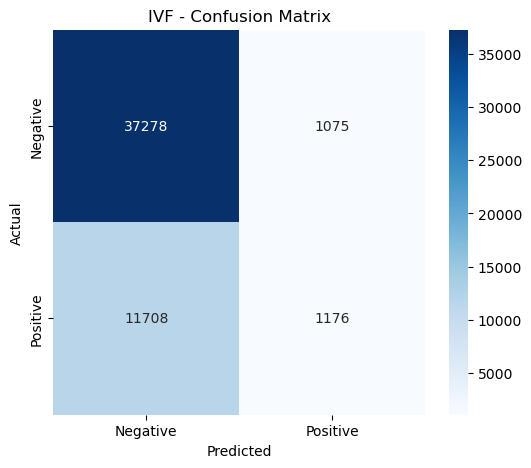

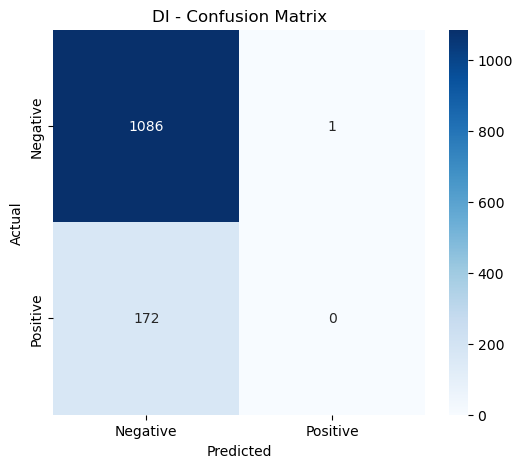

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# IVF 데이터셋 예측값 생성
y_pred_ivf = (mlp_ivf.predict(X_test_ivf) > 0.5).astype(int)

# DI 데이터셋 예측값 생성
y_pred_di = (mlp_di.predict(X_test_di) > 0.5).astype(int)

# 컨퓨전 매트릭스 출력 함수
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# IVF 데이터셋 컨퓨전 매트릭스
plot_confusion_matrix(y_test_ivf, y_pred_ivf, "IVF - Confusion Matrix")

# DI 데이터셋 컨퓨전 매트릭스
plot_confusion_matrix(y_test_di, y_pred_di, "DI - Confusion Matrix")


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score

# 데이터 파일 경로
file_ivf = "/Users/yudayeon/Desktop/캡스톤_결과/open/df_IVF.csv"
file_di = "/Users/yudayeon/Desktop/캡스톤_결과/open/df_DI.csv"

# 데이터 로드
df_ivf = pd.read_csv(file_ivf)
df_di = pd.read_csv(file_di)

# 종속 변수(타겟) 설정
target_col = "임신 성공 여부"

def preprocess_data(df):
    X = df.drop(columns=[target_col])
    y = LabelEncoder().fit_transform(df[target_col])
    
    # 언더샘플링 적용 (다수 클래스 줄이기)
    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X, y)

    # 데이터 스케일링
    X_scaled = StandardScaler().fit_transform(X_resampled)

    # 8:2로 데이터 나누기
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

    # 오버샘플링 적용 (훈련 데이터에서만)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    return X_train_resampled, X_test, y_train_resampled, y_test

# IVF 데이터 전처리
X_train_ivf, X_test_ivf, y_train_ivf, y_test_ivf = preprocess_data(df_ivf)

# DI 데이터 전처리
X_train_di, X_test_di, y_train_di, y_test_di = preprocess_data(df_di)

# MLP 모델 정의
def create_mlp_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# IVF 데이터셋 MLP 학습 및 평가
mlp_ivf = create_mlp_model(X_train_ivf.shape[1])
mlp_ivf.fit(X_train_ivf, y_train_ivf, epochs=20, batch_size=32, validation_data=(X_test_ivf, y_test_ivf))

# 예측 및 평가
y_pred_ivf = (mlp_ivf.predict(X_test_ivf) > 0.5).astype(int)
conf_matrix_ivf = confusion_matrix(y_test_ivf, y_pred_ivf)
accuracy_ivf = accuracy_score(y_test_ivf, y_pred_ivf)

# DI 데이터셋 MLP 학습 및 평가
mlp_di = create_mlp_model(X_train_di.shape[1])
mlp_di.fit(X_train_di, y_train_di, epochs=20, batch_size=32, validation_data=(X_test_di, y_test_di))

# 예측 및 평가
y_pred_di = (mlp_di.predict(X_test_di) > 0.5).astype(int)
conf_matrix_di = confusion_matrix(y_test_di, y_pred_di)
accuracy_di = accuracy_score(y_test_di, y_pred_di)

# 정확도 계산 (5:5 비율의 테스트 데이터 기준)
expected_accuracy = 0.5

# 결과 출력
print(f"IVF - MLP 정확도: {accuracy_ivf:.4f}")
print(f"DI - MLP 정확도: {accuracy_di:.4f}")
print(f"IVF Confusion Matrix:\n{conf_matrix_ivf}")
print(f"DI Confusion Matrix:\n{conf_matrix_di}")
print(f"예상 정확도 (5:5 비율 테스트셋 기준): {expected_accuracy:.2%}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 3s 767us/step - accuracy: 0.6457 - loss: 0.6060 - val_accuracy: 0.6693 - val_loss: 0.5787
Epoch 2/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.6671 - loss: 0.5788 - val_accuracy: 0.6735 - val_loss: 0.5732
Epoch 3/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 3s 775us/step - accuracy: 0.6705 - loss: 0.5754 - val_accuracy: 0.6751 - val_loss: 0.5724
Epoch 4/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 3s 760us/step - accuracy: 0.6753 - loss: 0.5711 - val_accuracy: 0.6766 - val_loss: 0.5698
Epoch 5/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - accuracy: 0.6748 - loss: 0.5719 - val_accuracy: 0.6763 - val_loss: 0.5699
Epoch 6/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 3s 763us/step - accuracy: 0.6733 - loss: 0.5724 - val_accuracy: 0.6730 - val_loss: 0.5715
Epoch 7/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 2s 743us/step - accuracy: 0.6761 - loss: 0.5703 - val_accuracy: 0.6771 - val_loss: 0.5679
Epoch 8/20
3279/3279 ━━━━━━━━━━━━━━━━━━━━ 2s 738us/step - accuracy: 0.6752 -

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4850 - loss: 0.7157 - val_accuracy: 0.5877 - val_loss: 0.6764
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5613 - loss: 0.6802 - val_accuracy: 0.5877 - val_loss: 0.6676
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5944 - loss: 0.6627 - val_accuracy: 0.6000 - val_loss: 0.6617
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5979 - loss: 0.6573 - val_accuracy: 0.5908 - val_loss: 0.6643
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5911 - loss: 0.6657 - val_accuracy: 0.6031 - val_loss: 0.6609
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6006 - loss: 0.6568 - val_accuracy: 0.6154 - val_loss: 0.6689
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6015 - loss: 0.6539 - val_accuracy: 0.5815 - val_loss: 0.6556
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6106 - loss: 0.6453 - val_accuracy: 0.6369 - val_loss: 0.6574
Epo